In [416]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from scipy.stats import shapiro
!pip install imblearn

In [417]:
# Adding datasets Tiktok (from 2019 to 2022) + Spotify unpopular songs

In [418]:
tiktok22 = pd.read_csv('TikTok_songs_2022.csv',index_col=0)
tiktok22.shape 

(263, 17)

In [419]:
unpopular = pd.read_csv('unpopular_songs.csv',index_col=0)
unpopular.shape 

(4073, 16)

In [420]:
tiktok21= pd.read_csv('TikTok_songs_2021.csv',index_col=0)
tiktok21.shape

(190, 17)

In [421]:
tiktok20= pd.read_csv('TikTok_songs_2020.csv',index_col=0)
tiktok20.shape

(292, 17)

In [422]:

tiktok19= pd.read_csv('TikTok_songs_2019.csv',index_col=0)
tiktok19.shape

(223, 17)

In [423]:


tiktok = pd.concat((tiktok19,tiktok20, tiktok21, tiktok22), axis=0)
tiktok.shape

(968, 17)

In [424]:
# both dataframes are not balanced


In [425]:

tiktok

,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
track_name,,,,,,,,,,,,,,,,,
Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.790,150.034,4,179947
Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.749,75.221,4,160000
Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.758,118.050,4,215507
The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.811,97.984,4,200594
Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.957,92.998,4,235760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365


In [426]:



tiktok.columns

Index(['artist_name', 'artist_pop', 'album', 'track_pop', 'danceability',
       'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms'],
      dtype='object')

In [427]:

#checking na

In [428]:
tiktok.isnull().sum() #checking nulls

artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [429]:
unpopular

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
danceability,,,,,,,,,,,,,,,,
0.722,0.476,5,-8.203,1,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
0.955,0.281,0,-11.392,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
0.753,0.355,8,-11.799,1,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
0.650,0.331,3,-10.818,0,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
0.690,0.360,4,-15.624,0,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.862,0.578,10,-9.364,0,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442,True,0,No Competition,T-Tomp,35ebaAwvPLjeTVUMQhyyqW
0.686,0.511,8,-10.253,0,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440,True,0,Test Me,T-Tomp,5WYoA9mhHWSyHkaGI3qKsO
0.725,0.555,8,-13.018,1,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742,True,0,Poof,T-Tomp,7aAsvABCFbZa7FsolZTASW


In [430]:
tableau = tiktok[['artist_name','energy','key','speechiness','acousticness','instrumentalness','liveness']].reset_index()
tableau

,track_name,artist_name,energy,key,speechiness,acousticness,instrumentalness,liveness
0,Shake It,Metro Station,0.955,4,0.0798,0.002210,0.000003,0.4860
1,Chinese New Year,SALES,0.845,4,0.2530,0.759000,0.232000,0.1000
2,Baby I'm Yours,Breakbot,0.792,2,0.0668,0.726000,0.000006,0.1220
3,The Git Up,Blanco Brown,0.678,9,0.1090,0.066900,0.000000,0.2740
4,Say Hey (I Love You),Michael Franti & Spearhead,0.983,5,0.0855,0.038000,0.000006,0.1830
...,...,...,...,...,...,...,...,...
963,The Less I Know The Better,Tame Impala,0.740,4,0.0284,0.011500,0.006780,0.1670
964,Dandelions,Ruth B.,0.692,1,0.0259,0.015700,0.000000,0.0864
965,Jimmy Cooks (feat. 21 Savage),Drake,0.673,0,0.1750,0.000307,0.000002,0.0930
966,Good Looking,Suki Waterhouse,0.558,4,0.0299,0.078900,0.000342,0.1250


In [431]:
unpopular

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
danceability,,,,,,,,,,,,,,,,
0.722,0.476,5,-8.203,1,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
0.955,0.281,0,-11.392,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
0.753,0.355,8,-11.799,1,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
0.650,0.331,3,-10.818,0,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
0.690,0.360,4,-15.624,0,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.862,0.578,10,-9.364,0,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442,True,0,No Competition,T-Tomp,35ebaAwvPLjeTVUMQhyyqW
0.686,0.511,8,-10.253,0,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440,True,0,Test Me,T-Tomp,5WYoA9mhHWSyHkaGI3qKsO
0.725,0.555,8,-13.018,1,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742,True,0,Poof,T-Tomp,7aAsvABCFbZa7FsolZTASW


In [432]:
tableau.to_csv('tableau_final_df.csv')

In [433]:
(unpopular['popularity'] ==0 ).sum()/len(unpopular['popularity'])*100 #to check how many popular songs exists

63.24576479253622

In [434]:
unpopular['popularity'].value_counts()

0    2576
1     836
2     240
8     123
7      99
3      93
4      56
5      30
6      16
9       4
Name: popularity, dtype: int64

In [435]:
unpopular = unpopular.loc[unpopular["popularity"] == 0] #adding only songs with popularity 0

In [436]:
unpopular['popularity'].value_counts()

0    2576
Name: popularity, dtype: int64

In [437]:
tiktok.columns

Index(['artist_name', 'artist_pop', 'album', 'track_pop', 'danceability',
       'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms'],
      dtype='object')

In [438]:
unpopular.isna().sum() #rechecking na

energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [439]:
unpopular.isnull().sum()#rechecking null

energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [440]:
tiktok.dtypes

artist_name          object
artist_pop            int64
album                object
track_pop             int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duration_ms           int64
dtype: object

In [441]:
unpopular.dtypes

energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
explicit               bool
popularity            int64
track_name           object
track_artist         object
track_id             object
dtype: object

In [442]:
tiktok = tiktok.drop(['artist_name', 'artist_pop', 'album', 'track_pop',
       'loudness', 'mode', 'valence', 'tempo', 'time_signature',
       'duration_ms'], axis = 1)

In [443]:
tiktok.columns

Index(['danceability', 'energy', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness'],
      dtype='object')

In [444]:
unpopular.columns

Index(['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'explicit', 'popularity', 'track_name', 'track_artist', 'track_id'],
      dtype='object')

In [445]:
unpopular = unpopular.drop(['explicit','track_name', 'track_artist', 'track_id','duration_ms', 'tempo', 'loudness', 'mode'],axis = 1)

In [446]:
tiktok = tiktok.reset_index()
tiktok

,track_name,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness
0,Shake It,0.618,0.955,4,0.0798,0.002210,0.000003,0.4860
1,Chinese New Year,0.744,0.845,4,0.2530,0.759000,0.232000,0.1000
2,Baby I'm Yours,0.829,0.792,2,0.0668,0.726000,0.000006,0.1220
3,The Git Up,0.847,0.678,9,0.1090,0.066900,0.000000,0.2740
4,Say Hey (I Love You),0.738,0.983,5,0.0855,0.038000,0.000006,0.1830
...,...,...,...,...,...,...,...,...
963,The Less I Know The Better,0.640,0.740,4,0.0284,0.011500,0.006780,0.1670
964,Dandelions,0.609,0.692,1,0.0259,0.015700,0.000000,0.0864
965,Jimmy Cooks (feat. 21 Savage),0.529,0.673,0,0.1750,0.000307,0.000002,0.0930
966,Good Looking,0.377,0.558,4,0.0299,0.078900,0.000342,0.1250


In [447]:
tiktok = tiktok.reindex(columns=['danceability','energy','key','speechiness','acousticness','instrumentalness','liveness'])

In [448]:
unpopular = unpopular.reset_index()

In [449]:
unpopular

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,popularity
0,0.955,0.281,0,0.466,0.00480,0.0595,0.1220,0.0934,0
1,0.753,0.355,8,0.514,0.57300,0.0000,0.0735,0.6000,0
2,0.650,0.331,3,0.383,0.86500,0.0000,0.1050,0.5810,0
3,0.690,0.360,4,0.455,0.76400,0.0000,0.1810,0.1050,0
4,0.849,0.275,6,0.694,0.41400,0.0000,0.0776,0.3760,0
...,...,...,...,...,...,...,...,...,...
2571,0.862,0.578,10,0.443,0.01460,0.0000,0.1190,0.3850,0
2572,0.686,0.511,8,0.435,0.01010,0.0000,0.1100,0.4020,0
2573,0.725,0.555,8,0.391,0.00189,0.0000,0.1100,0.1390,0
2574,0.763,0.534,1,0.317,0.00531,0.0000,0.1110,0.3020,0


In [450]:
tiktok.isna().sum()

danceability        0
energy              0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
dtype: int64

In [451]:
tiktok = tiktok.drop(['danceability'],axis = 1)

In [452]:
tiktok

,energy,key,speechiness,acousticness,instrumentalness,liveness
0,0.955,4,0.0798,0.002210,0.000003,0.4860
1,0.845,4,0.2530,0.759000,0.232000,0.1000
2,0.792,2,0.0668,0.726000,0.000006,0.1220
3,0.678,9,0.1090,0.066900,0.000000,0.2740
4,0.983,5,0.0855,0.038000,0.000006,0.1830
...,...,...,...,...,...,...
963,0.740,4,0.0284,0.011500,0.006780,0.1670
964,0.692,1,0.0259,0.015700,0.000000,0.0864
965,0.673,0,0.1750,0.000307,0.000002,0.0930
966,0.558,4,0.0299,0.078900,0.000342,0.1250


In [453]:
tiktok.value_counts().sum()/len(tiktok) #no duplicates 

1.0

In [454]:
unpopular.value_counts().sum()/len(unpopular) #no duplicates 

1.0

In [455]:
unpopular

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,popularity
0,0.955,0.281,0,0.466,0.00480,0.0595,0.1220,0.0934,0
1,0.753,0.355,8,0.514,0.57300,0.0000,0.0735,0.6000,0
2,0.650,0.331,3,0.383,0.86500,0.0000,0.1050,0.5810,0
3,0.690,0.360,4,0.455,0.76400,0.0000,0.1810,0.1050,0
4,0.849,0.275,6,0.694,0.41400,0.0000,0.0776,0.3760,0
...,...,...,...,...,...,...,...,...,...
2571,0.862,0.578,10,0.443,0.01460,0.0000,0.1190,0.3850,0
2572,0.686,0.511,8,0.435,0.01010,0.0000,0.1100,0.4020,0
2573,0.725,0.555,8,0.391,0.00189,0.0000,0.1100,0.1390,0
2574,0.763,0.534,1,0.317,0.00531,0.0000,0.1110,0.3020,0


In [456]:
unpopular.isna().sum()

danceability        0
energy              0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
popularity          0
dtype: int64

In [457]:
#check for multicolinearity 

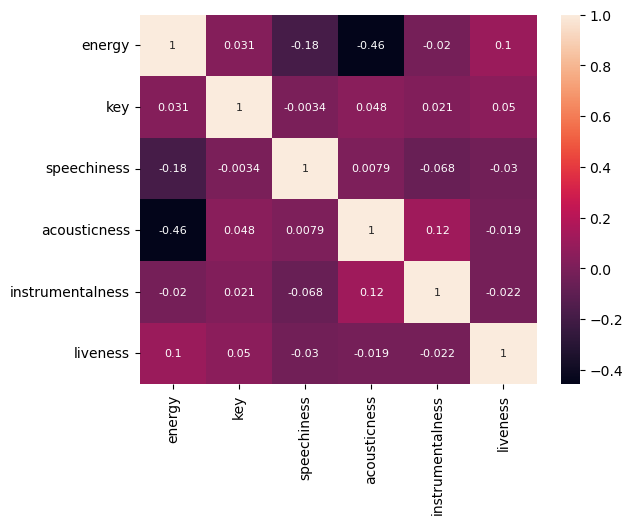

In [458]:
sns.heatmap(tiktok.corr(),annot=True,annot_kws={"size": 8})
plt.show()

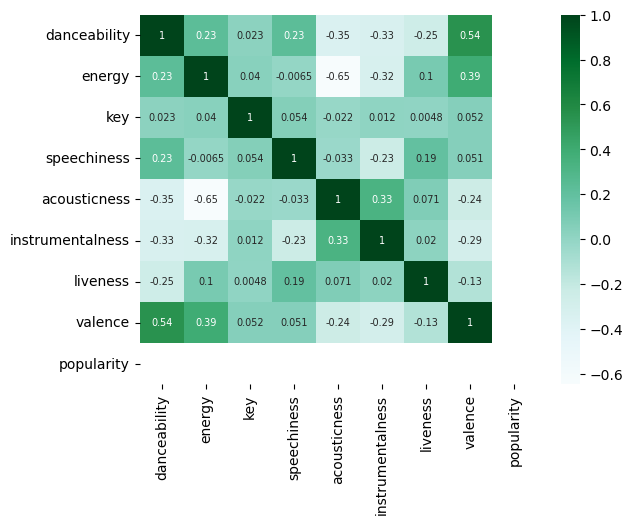

In [459]:
sns.heatmap(unpopular.corr(),cmap="BuGn",annot=True,annot_kws={"size": 7})
plt.show()

In [460]:
#droping extra columns
unpopular = unpopular.drop(['danceability','valence'],axis = 1)

In [461]:
tiktok.dtypes

energy              float64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
dtype: object

In [462]:
unpopular.dtypes

energy              float64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
popularity            int64
dtype: object

In [463]:
def plot_distribution(tiktok): #ploting distribution
    for col in tiktok.columns:
        stat, p = shapiro(tiktok[col])

        if p > 0.05:
            print('The data is normal.')
        else:
            print('The data is likely not normal.')
            
    return tiktok

In [464]:
plot_distribution(tiktok)

The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.


,energy,key,speechiness,acousticness,instrumentalness,liveness
0,0.955,4,0.0798,0.002210,0.000003,0.4860
1,0.845,4,0.2530,0.759000,0.232000,0.1000
2,0.792,2,0.0668,0.726000,0.000006,0.1220
3,0.678,9,0.1090,0.066900,0.000000,0.2740
4,0.983,5,0.0855,0.038000,0.000006,0.1830
...,...,...,...,...,...,...
963,0.740,4,0.0284,0.011500,0.006780,0.1670
964,0.692,1,0.0259,0.015700,0.000000,0.0864
965,0.673,0,0.1750,0.000307,0.000002,0.0930
966,0.558,4,0.0299,0.078900,0.000342,0.1250


In [465]:
plot_distribution(unpopular)

The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is normal.


/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,energy,key,speechiness,acousticness,instrumentalness,liveness,popularity
0,0.281,0,0.466,0.00480,0.0595,0.1220,0
1,0.355,8,0.514,0.57300,0.0000,0.0735,0
2,0.331,3,0.383,0.86500,0.0000,0.1050,0
3,0.360,4,0.455,0.76400,0.0000,0.1810,0
4,0.275,6,0.694,0.41400,0.0000,0.0776,0
...,...,...,...,...,...,...,...
2571,0.578,10,0.443,0.01460,0.0000,0.1190,0
2572,0.511,8,0.435,0.01010,0.0000,0.1100,0
2573,0.555,8,0.391,0.00189,0.0000,0.1100,0
2574,0.534,1,0.317,0.00531,0.0000,0.1110,0


In [466]:
def plot_distribution(tiktok):
    for col in tiktok.columns:
        sns.histplot(tiktok[col])
        plt.show()
 
            
    return tiktok

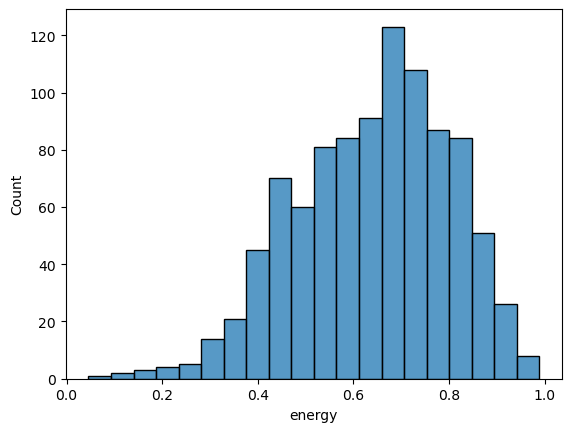

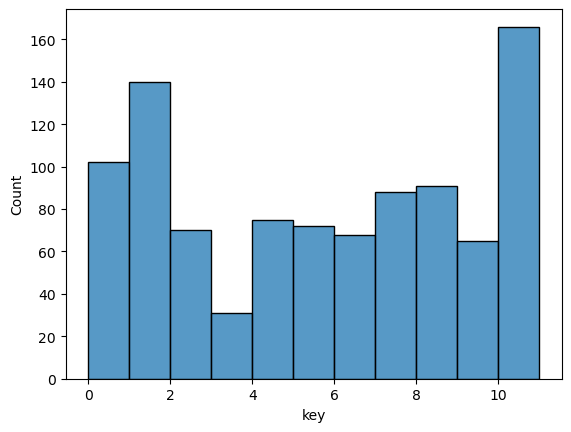

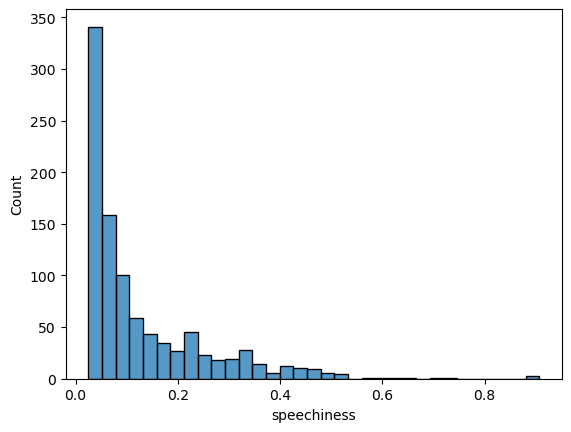

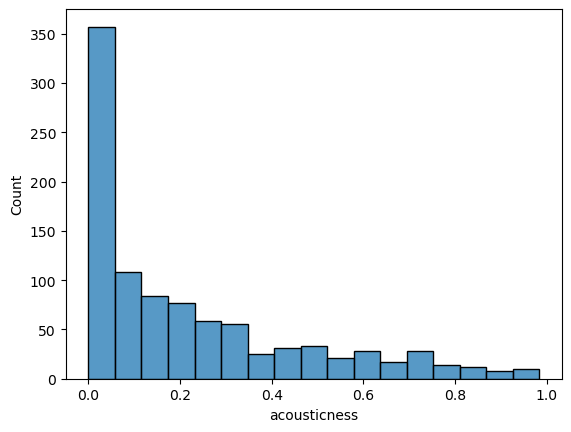

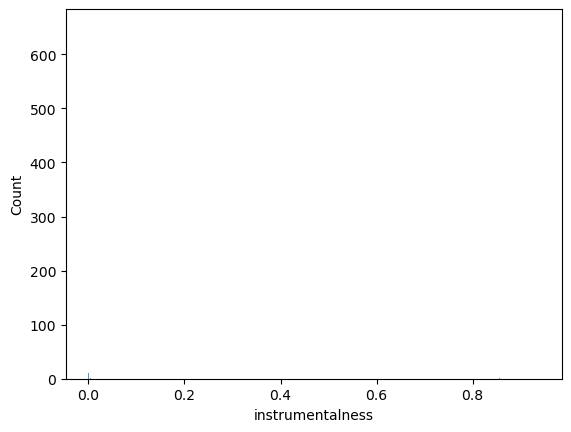

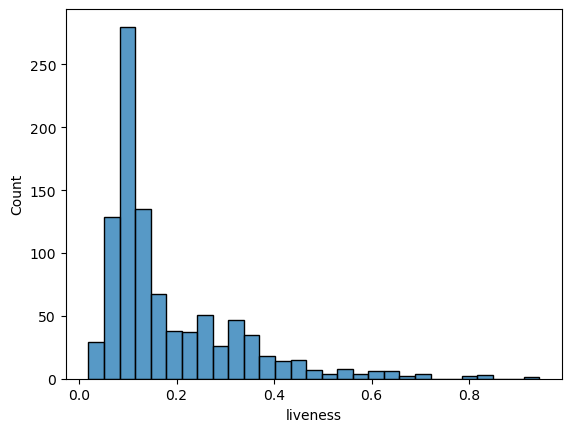

,energy,key,speechiness,acousticness,instrumentalness,liveness
0,0.955,4,0.0798,0.002210,0.000003,0.4860
1,0.845,4,0.2530,0.759000,0.232000,0.1000
2,0.792,2,0.0668,0.726000,0.000006,0.1220
3,0.678,9,0.1090,0.066900,0.000000,0.2740
4,0.983,5,0.0855,0.038000,0.000006,0.1830
...,...,...,...,...,...,...
963,0.740,4,0.0284,0.011500,0.006780,0.1670
964,0.692,1,0.0259,0.015700,0.000000,0.0864
965,0.673,0,0.1750,0.000307,0.000002,0.0930
966,0.558,4,0.0299,0.078900,0.000342,0.1250


In [467]:
plot_distribution(tiktok)

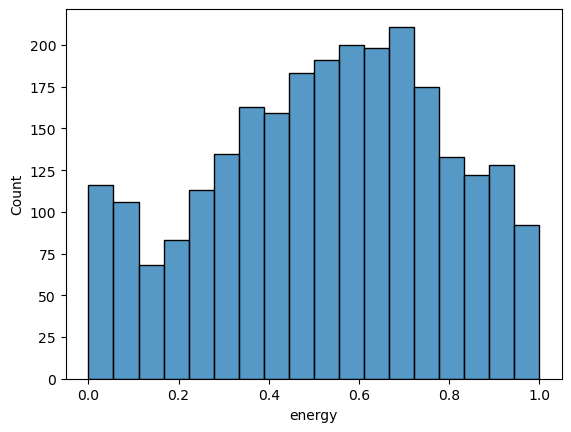

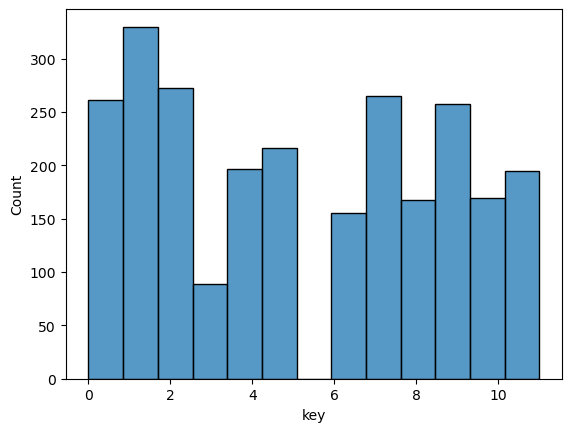

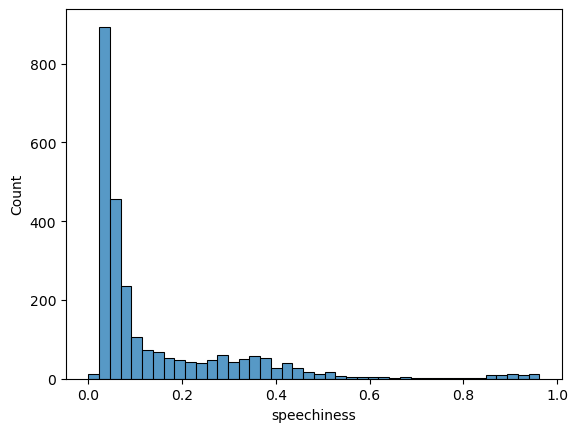

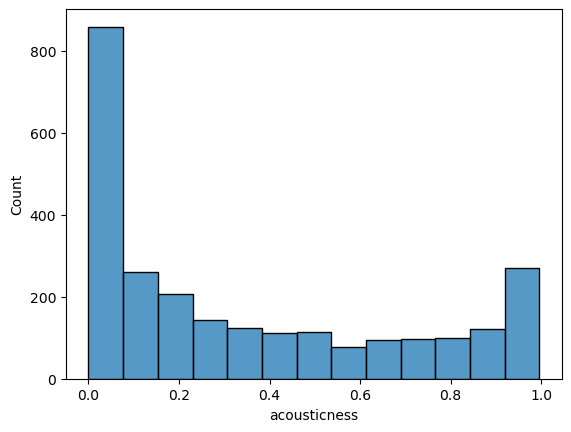

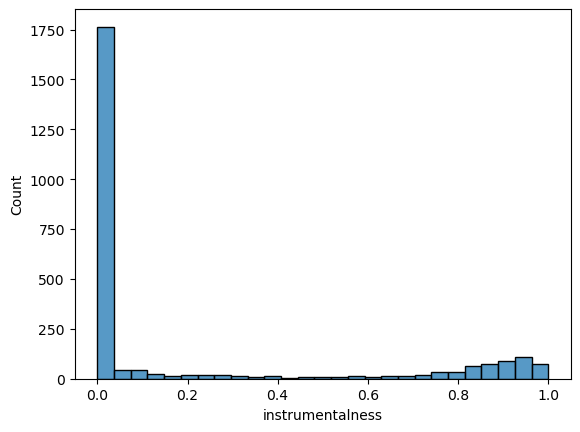

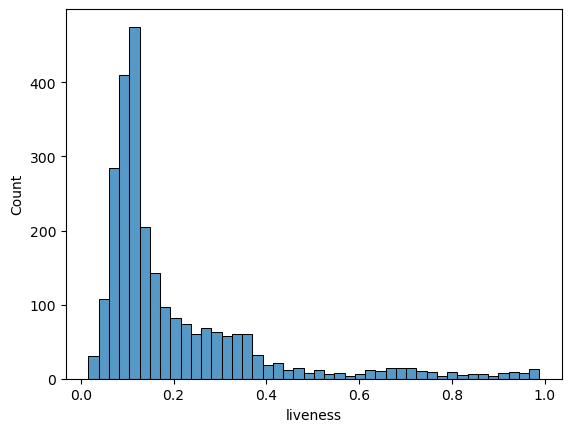

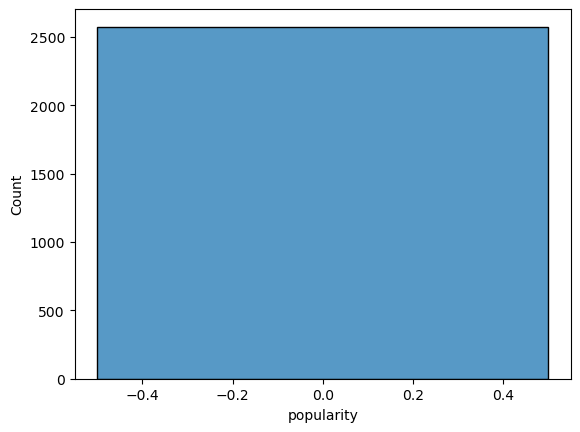

,energy,key,speechiness,acousticness,instrumentalness,liveness,popularity
0,0.281,0,0.466,0.00480,0.0595,0.1220,0
1,0.355,8,0.514,0.57300,0.0000,0.0735,0
2,0.331,3,0.383,0.86500,0.0000,0.1050,0
3,0.360,4,0.455,0.76400,0.0000,0.1810,0
4,0.275,6,0.694,0.41400,0.0000,0.0776,0
...,...,...,...,...,...,...,...
2571,0.578,10,0.443,0.01460,0.0000,0.1190,0
2572,0.511,8,0.435,0.01010,0.0000,0.1100,0
2573,0.555,8,0.391,0.00189,0.0000,0.1100,0
2574,0.534,1,0.317,0.00531,0.0000,0.1110,0


In [468]:
plot_distribution(unpopular)

In [469]:
unpopular

,energy,key,speechiness,acousticness,instrumentalness,liveness,popularity
0,0.281,0,0.466,0.00480,0.0595,0.1220,0
1,0.355,8,0.514,0.57300,0.0000,0.0735,0
2,0.331,3,0.383,0.86500,0.0000,0.1050,0
3,0.360,4,0.455,0.76400,0.0000,0.1810,0
4,0.275,6,0.694,0.41400,0.0000,0.0776,0
...,...,...,...,...,...,...,...
2571,0.578,10,0.443,0.01460,0.0000,0.1190,0
2572,0.511,8,0.435,0.01010,0.0000,0.1100,0
2573,0.555,8,0.391,0.00189,0.0000,0.1100,0
2574,0.534,1,0.317,0.00531,0.0000,0.1110,0


In [470]:
#The data is not balanced but it's already transformed

In [471]:
tiktok['popularity'] = 1 #adding values to the future target variable 0= Not popular 1=popular

In [472]:
tiktok

,energy,key,speechiness,acousticness,instrumentalness,liveness,popularity
0,0.955,4,0.0798,0.002210,0.000003,0.4860,1
1,0.845,4,0.2530,0.759000,0.232000,0.1000,1
2,0.792,2,0.0668,0.726000,0.000006,0.1220,1
3,0.678,9,0.1090,0.066900,0.000000,0.2740,1
4,0.983,5,0.0855,0.038000,0.000006,0.1830,1
...,...,...,...,...,...,...,...
963,0.740,4,0.0284,0.011500,0.006780,0.1670,1
964,0.692,1,0.0259,0.015700,0.000000,0.0864,1
965,0.673,0,0.1750,0.000307,0.000002,0.0930,1
966,0.558,4,0.0299,0.078900,0.000342,0.1250,1


In [473]:
# X-Y Definition

In [474]:
X = pd.concat((tiktok, unpopular), axis=0)
X.isna().sum()

energy              0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
popularity          0
dtype: int64

In [475]:
X.to_csv('cleaned_data.csv')

In [476]:
Y = pd.DataFrame(X['popularity']) #defying Y

In [477]:
X = X.drop(['popularity'],axis=1) #droping Y from X

In [478]:
# Tried StandardScaler, Normalizer & MinMaxScaler - this was the best option
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X)
x_min_max = transformer.transform(X)
X = pd.DataFrame(x_min_max)

In [479]:
# Applying logistic regression model

In [480]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4)

In [481]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression().fit(X_train,y_train)

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [482]:
predictions = classification.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [483]:
classification.score(X_test,y_test)

0.7383638928067701

In [484]:
y_test.value_counts()

popularity
0             1049
1              369
dtype: int64

In [485]:
pd.Series(predictions).value_counts()

0    1416
1       2
dtype: int64

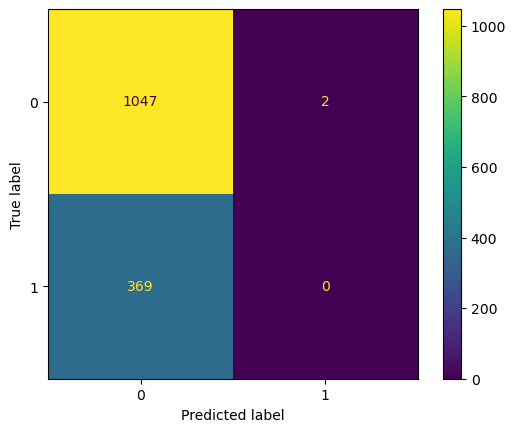

In [486]:
cm = confusion_matrix(y_test, predictions, labels=classification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classification.classes_)
disp.plot()

plt.show()

In [487]:
Y.value_counts()

popularity
0             2576
1              968
dtype: int64

In [488]:
X.shape

(3544, 6)

In [489]:
# trying balance data to get better results
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [490]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, Y)

In [491]:
y_ros.value_counts()

popularity
0             2576
1             2576
dtype: int64

In [492]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size = 0.4)

In [493]:
classification = LogisticRegression().fit(X_train,y_train)

/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [494]:
predictions = classification.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 0, 1])

In [495]:
classification.score(X_test,y_test)

0.6477438136826783

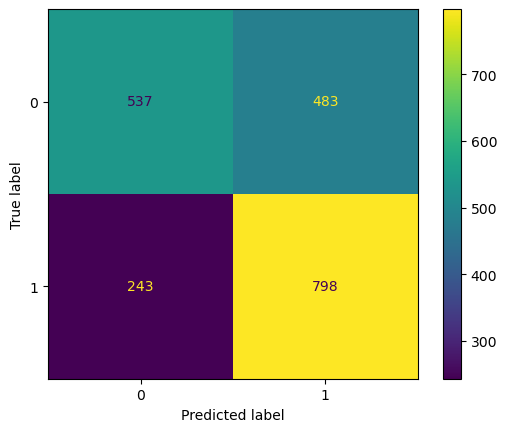

In [496]:
cm = confusion_matrix(y_test, predictions, labels=classification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classification.classes_)
disp.plot()

plt.show()

In [497]:
pd.Series(predictions).value_counts()

1    1281
0     780
dtype: int64

In [498]:
#apllyiing KNN

In [499]:
from sklearn.neighbors import KNeighborsRegressor

In [500]:
kmodel = KNeighborsRegressor(n_neighbors=4)
kmodel.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [501]:
predictions = kmodel.predict(X_test)
kmodel.score(X_test,y_test)

0.19702968723512448

In [502]:
tiktok.to_csv('tiktok_cleaned.csv')

In [503]:
unpopular.to_csv('unpopular_cleaned.csv')

In [504]:
# The results from KNN are not good and the ones from the Logistic Regressions are but the model can't predict as I wish

In [505]:
#hypotesis test
unpopular
unpopular

,energy,key,speechiness,acousticness,instrumentalness,liveness,popularity
0,0.281,0,0.466,0.00480,0.0595,0.1220,0
1,0.355,8,0.514,0.57300,0.0000,0.0735,0
2,0.331,3,0.383,0.86500,0.0000,0.1050,0
3,0.360,4,0.455,0.76400,0.0000,0.1810,0
4,0.275,6,0.694,0.41400,0.0000,0.0776,0
...,...,...,...,...,...,...,...
2571,0.578,10,0.443,0.01460,0.0000,0.1190,0
2572,0.511,8,0.435,0.01010,0.0000,0.1100,0
2573,0.555,8,0.391,0.00189,0.0000,0.1100,0
2574,0.534,1,0.317,0.00531,0.0000,0.1110,0


In [506]:
#Null Hypothesis: There is no difference between unpopular Spotify songs and Tiktok songs on Tiktok.

#H0: There is no difference in average test scores between unpopular Spotify songs and TikTok songs


In [507]:
from scipy.stats import ttest_ind

statistic, pvalue = ttest_ind(unpopular, tiktok)

print(statistic, pvalue)

[-12.87784594  -0.93204925   2.98242335  10.6025428   15.91852064
   2.61614496         -inf] [4.03252825e-37 3.51374599e-01 2.87925631e-03 7.05487231e-26
 3.69423199e-55 8.93063924e-03 0.00000000e+00]


/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_63026/3035874606.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statistic, pvalue = ttest_ind(unpopular, tiktok)


In [508]:
pvalue

array([4.03252825e-37, 3.51374599e-01, 2.87925631e-03, 7.05487231e-26,
       3.69423199e-55, 8.93063924e-03, 0.00000000e+00])

In [509]:
statistic

array([-12.87784594,  -0.93204925,   2.98242335,  10.6025428 ,
        15.91852064,   2.61614496,         -inf])

In [510]:
#results of the study are not statistically significant and there is not enough evidence to reject the null hypothesis. 
#This means that the results of the study are not reliable and may have been obtained due to chance.

In [511]:
#checking for differences between songs (average) for insights
tiktok['energy'].mean()

0.642242561983473

In [512]:
unpopular['energy'].mean()

0.5277533075698759

In [513]:
tiktok['key'].mean()

5.288223140495868

In [514]:
unpopular['key'].mean()

5.161878881987578

In [515]:
tiktok['speechiness'].mean()

0.13004555785123956

In [516]:
unpopular['speechiness'].mean()

0.14878078416149043

In [517]:
tiktok['acousticness'].mean()

0.22036039597107432

In [518]:
unpopular['acousticness'].mean()

0.347723687173913

In [519]:
tiktok['instrumentalness'].mean()

0.023384849504132253

In [520]:
unpopular['instrumentalness'].mean()

0.2082284916149067

In [521]:
tiktok['liveness'].mean()

0.18471198347107406

In [522]:
unpopular['liveness'].mean()

0.20169747670807459

In [528]:
unpopular['key'].max()

11